# 3
CS595A Final Project 
Members: Kevin Dumitrescu, Victoria Jordan, Ozgur Ural 
Topic: Spotify Song Feature Analysis: User Generated vs Spotify Recommended

In [1]:
#import statements
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import json
import requests
import os
from decimal import Decimal

Shape dataset of json file (user generated)

In [2]:
df_userP = pd.read_json('user_json.json')
df_userP.shape

(60, 16)

Display user generated playlist information 

In [3]:
df_userP.head()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1DunhgeZSEgWiIYbHqXl0c,Latch,Disclosure,"[Disclosure, Sam Smith]",0.729,0.735,1,-5.455,1,0.0178,0.000193,0.089,0.544,121.986,255867,4
1,52xJxFP6TqMuO4Yt0eOkMz,We Don't Talk About Bruno,Carolina Gaitán - La Gaita,"[Carolina Gaitán - La Gaita, Mauro Castillo, A...",0.577,0.450,0,-8.516,0,0.3570,0.000000,0.111,0.830,205.863,216120,4
2,7oOOI85fVQvVnK5ynNMdW7,Rock with You - Single Version,Michael Jackson,[Michael Jackson],0.808,0.535,1,-12.521,1,0.1790,0.000099,0.158,0.848,114.031,220627,4
3,7ruiupyTfOflj8JSHCG6vL,Go Gina,SZA,[SZA],0.569,0.610,6,-6.105,0,0.7840,0.000000,0.392,0.413,79.680,161613,4
4,0rFOs9paloAvEtzwDX1Kmc,Bubbly,Colbie Caillat,[Colbie Caillat],0.697,0.474,9,-6.663,1,0.6030,0.000000,0.110,0.249,127.904,196280,4


In [4]:
display(df_userP)

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1DunhgeZSEgWiIYbHqXl0c,Latch,Disclosure,"[Disclosure, Sam Smith]",0.729,0.735,1,-5.455,1,0.01780,0.000193,0.0890,0.5440,121.986,255867,4
1,52xJxFP6TqMuO4Yt0eOkMz,We Don't Talk About Bruno,Carolina Gaitán - La Gaita,"[Carolina Gaitán - La Gaita, Mauro Castillo, A...",0.577,0.450,0,-8.516,0,0.35700,0.000000,0.1110,0.8300,205.863,216120,4
2,7oOOI85fVQvVnK5ynNMdW7,Rock with You - Single Version,Michael Jackson,[Michael Jackson],0.808,0.535,1,-12.521,1,0.17900,0.000099,0.1580,0.8480,114.031,220627,4
3,7ruiupyTfOflj8JSHCG6vL,Go Gina,SZA,[SZA],0.569,0.610,6,-6.105,0,0.78400,0.000000,0.3920,0.4130,79.680,161613,4
4,0rFOs9paloAvEtzwDX1Kmc,Bubbly,Colbie Caillat,[Colbie Caillat],0.697,0.474,9,-6.663,1,0.60300,0.000000,0.1100,0.2490,127.904,196280,4
5,0MSJk0VWUxAGat5vhJ4q4N,A-O-K,Tai Verdes,[Tai Verdes],0.729,0.636,1,-6.487,0,0.15800,0.000000,0.2130,0.8110,82.498,173640,4
6,6x4tKaOzfNJpEJHySoiJcs,Mambo No. 5 (a Little Bit of...),Lou Bega,[Lou Bega],0.622,0.807,5,-6.752,0,0.10300,0.000000,0.3060,0.8920,174.060,220293,4
7,10ImcQk9tihY1EKMDIbvXJ,To Be Loved,Adele,[Adele],0.356,0.176,8,-8.291,1,0.84300,0.000000,0.2310,0.2890,170.425,403962,1
8,6M47gaKejso9772SKTa3yH,Face Off,Tech N9ne,"[Tech N9ne, Joey Cool, King Iso, Dwayne Johnson]",0.693,0.935,8,-4.323,1,0.18000,0.000000,0.1790,0.3910,80.882,219802,4
9,5JCoSi02qi3jJeHdZXMmR8,favorite crime,Olivia Rodrigo,[Olivia Rodrigo],0.369,0.272,9,-10.497,1,0.86600,0.000000,0.1470,0.2180,172.929,152667,4


In [5]:
df_userP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                60 non-null     object 
 1   title             60 non-null     object 
 2   first_artist      60 non-null     object 
 3   all_artists       60 non-null     object 
 4   danceability      60 non-null     float64
 5   energy            60 non-null     float64
 6   key               60 non-null     int64  
 7   loudness          60 non-null     float64
 8   mode              60 non-null     int64  
 9   acousticness      60 non-null     float64
 10  instrumentalness  60 non-null     float64
 11  liveness          60 non-null     float64
 12  valence           60 non-null     float64
 13  tempo             60 non-null     float64
 14  duration_ms       60 non-null     int64  
 15  time_signature    60 non-null     int64  
dtypes: float64(8), int64(4), object(4)
memory usag

User generated playlist song features analysis

In [6]:
df_userP.describe()

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.653533,0.658883,4.833333,-6.139717,0.633333,0.173051,0.030304,0.222538,0.545758,119.720500,218073.333333,3.850000
std,0.161532,0.168497,3.760484,1.881999,0.485961,0.235981,0.120657,0.156626,0.227084,34.990282,43764.851359,0.577106
min,0.212000,0.176000,0.000000,-12.521000,0.000000,0.001070,0.000000,0.034400,0.081500,65.043000,134240.000000,1.000000
25%,0.574500,0.538500,1.000000,-7.064250,0.000000,0.018750,0.000000,0.105600,0.368000,89.933250,190687.000000,4.000000
50%,0.704000,0.670500,5.000000,-5.768000,1.000000,0.091000,0.000000,0.177500,0.552500,114.509500,216911.500000,4.000000
75%,0.785000,0.791250,8.000000,-4.775250,1.000000,0.185000,0.000017,0.311250,0.721000,137.690250,239090.000000,4.000000
max,0.897000,0.955000,11.000000,-3.240000,1.000000,0.934000,0.637000,0.700000,0.969000,205.863000,403962.000000,4.000000


In [7]:
df_userP.corr().style.background_gradient(cmap='Blues')

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
danceability,1.000000,0.320603,-0.292605,0.265182,-0.015820,-0.537994,0.073494,0.002177,0.373596,-0.357157,-0.074864,0.503959
energy,0.320603,1.000000,0.049348,0.591230,-0.140665,-0.613172,0.212384,0.089526,0.330876,-0.104390,-0.044566,0.350512
key,-0.292605,0.049348,1.000000,0.090311,-0.145305,0.193502,0.083198,-0.172919,-0.185131,0.080313,0.084462,-0.175724
loudness,0.265182,0.591230,0.090311,1.000000,-0.197864,-0.504348,0.080041,0.060561,-0.034437,-0.179418,-0.003907,0.146199
mode,-0.015820,-0.140665,-0.145305,-0.197864,1.000000,0.002160,0.155685,0.036796,-0.084446,0.230013,-0.036997,-0.199437
acousticness,-0.537994,-0.613172,0.193502,-0.504348,0.002160,1.000000,-0.106507,-0.059819,-0.332335,0.166552,-0.047030,-0.421475
instrumentalness,0.073494,0.212384,0.083198,0.080041,0.155685,-0.106507,1.000000,-0.137140,0.099350,0.037190,-0.119775,-0.124934
liveness,0.002177,0.089526,-0.172919,0.060561,0.036796,-0.059819,-0.137140,1.000000,0.108144,-0.120980,-0.015222,0.002240
valence,0.373596,0.330876,-0.185131,-0.034437,-0.084446,-0.332335,0.099350,0.108144,1.000000,0.072230,0.074573,0.267953
tempo,-0.357157,-0.104390,0.080313,-0.179418,0.230013,0.166552,0.037190,-0.120980,0.072230,1.000000,0.023229,-0.121869


Shape dataset of json file (Spotify recommended)

In [8]:
df_spotR = pd.read_json('rec_json.json')
df_spotR.shape

(60, 16)

Display Spotify recommended playlist information

In [9]:
df_spotR.head()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1KtD0xaLAikgIt5tPbteZQ,Thinking About You (feat. Ayah Marar),Calvin Harris,"[Calvin Harris, Ayah Marar]",0.725,0.874,0,-3.715,0,0.00262,0.000412,0.0958,0.748,127.985,247933,4
1,4b1yxSdlumA8N4fEk4UOZp,The Family Madrigal,Stephanie Beatriz,"[Stephanie Beatriz, Olga Merediz, Encanto - Cast]",0.594,0.628,1,-6.345,1,0.12000,0.000000,0.0582,0.556,141.391,257213,4
2,4E6cwWJWZw2zWf7VFbH7wf,Love Song,Sara Bareilles,[Sara Bareilles],0.583,0.786,2,-3.142,0,0.02080,0.000000,0.1880,0.573,123.055,258827,4
3,1ts8KebAIm5xCiGInoWiqp,Fine Apple,Nic D,[Nic D],0.925,0.558,2,-5.362,1,0.17800,0.000000,0.1250,0.467,119.992,153297,4
4,4Y6cDd4EPHcEbiUKdyvNwM,Macarena,Los Del Rio,[Los Del Rio],0.923,0.679,8,-14.019,1,0.42800,0.000131,0.0908,0.965,103.017,251293,4


In [10]:
display(df_spotR)

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1KtD0xaLAikgIt5tPbteZQ,Thinking About You (feat. Ayah Marar),Calvin Harris,"[Calvin Harris, Ayah Marar]",0.725,0.874,0,-3.715,0,0.002620,0.000412,0.0958,0.748,127.985,247933,4
1,4b1yxSdlumA8N4fEk4UOZp,The Family Madrigal,Stephanie Beatriz,"[Stephanie Beatriz, Olga Merediz, Encanto - Cast]",0.594,0.628,1,-6.345,1,0.120000,0.000000,0.0582,0.556,141.391,257213,4
2,4E6cwWJWZw2zWf7VFbH7wf,Love Song,Sara Bareilles,[Sara Bareilles],0.583,0.786,2,-3.142,0,0.020800,0.000000,0.1880,0.573,123.055,258827,4
3,1ts8KebAIm5xCiGInoWiqp,Fine Apple,Nic D,[Nic D],0.925,0.558,2,-5.362,1,0.178000,0.000000,0.1250,0.467,119.992,153297,4
4,4Y6cDd4EPHcEbiUKdyvNwM,Macarena,Los Del Rio,[Los Del Rio],0.923,0.679,8,-14.019,1,0.428000,0.000131,0.0908,0.965,103.017,251293,4
5,6kUaRtXf19fu5IQWjmwsEJ,Venom - Remix,Eminem,[Eminem],0.763,0.827,7,-3.927,1,0.023200,0.000000,0.2660,0.710,135.986,261603,4
6,7a8GawTVgHZvBLQOh46he7,I Wanna Be Yours,Arctic Monkeys,[Arctic Monkeys],0.464,0.417,0,-9.345,0,0.136000,0.022000,0.0974,0.479,67.528,183956,4
7,4znJLBeXcOzPUg2mm5LfZV,John Doe (feat. Priscilla),B.o.B,"[B.o.B, Priscilla Renea]",0.722,0.697,10,-7.083,1,0.239000,0.000000,0.0620,0.487,120.132,212006,4
8,7JDWhC422Gtk1Bq0mL3OTC,feel something,Bea Miller,[Bea Miller],0.740,0.415,0,-8.914,1,0.242000,0.000156,0.3190,0.156,136.029,180161,4
9,0HNXnhNZZtRZFLhP4hfyCP,Hey Baby (Radio Mix),DJ Ötzi,[DJ Ötzi],0.666,0.968,10,-3.196,1,0.123000,0.000000,0.3470,0.834,135.099,219240,4


In [11]:
df_spotR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                60 non-null     object 
 1   title             60 non-null     object 
 2   first_artist      60 non-null     object 
 3   all_artists       60 non-null     object 
 4   danceability      60 non-null     float64
 5   energy            60 non-null     float64
 6   key               60 non-null     int64  
 7   loudness          60 non-null     float64
 8   mode              60 non-null     int64  
 9   acousticness      60 non-null     float64
 10  instrumentalness  60 non-null     float64
 11  liveness          60 non-null     float64
 12  valence           60 non-null     float64
 13  tempo             60 non-null     float64
 14  duration_ms       60 non-null     int64  
 15  time_signature    60 non-null     int64  
dtypes: float64(8), int64(4), object(4)
memory usag

Spotify recommended playlist song features analysis

In [12]:
df_spotR.describe()

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.694050,0.679283,4.800000,-6.107950,0.533333,0.157032,0.007398,0.191813,0.613933,117.482850,218726.350000,3.916667
std,0.140175,0.159211,3.767839,2.285923,0.503098,0.184786,0.033923,0.113870,0.208044,27.048127,40139.568963,0.423531
min,0.286000,0.342000,0.000000,-14.019000,0.000000,0.000501,0.000000,0.058200,0.121000,65.043000,126225.000000,1.000000
25%,0.622500,0.557750,1.000000,-7.354750,0.000000,0.019175,0.000000,0.095025,0.482500,96.496750,197555.000000,4.000000
50%,0.707000,0.680500,5.000000,-5.819000,1.000000,0.096000,0.000000,0.148500,0.619000,121.056500,219280.000000,4.000000
75%,0.771250,0.824250,7.250000,-4.484500,1.000000,0.224000,0.000137,0.288500,0.757250,135.996750,242033.750000,4.000000
max,0.978000,0.968000,11.000000,-2.457000,1.000000,0.740000,0.219000,0.483000,0.965000,173.556000,387493.000000,4.000000


In [13]:
df_spotR.corr().style.background_gradient(cmap='Blues')

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
danceability,1.000000,0.147404,-0.044716,0.054412,0.065228,-0.342844,0.118575,-0.105456,0.272304,-0.251329,-0.073614,0.305831
energy,0.147404,1.000000,0.158150,0.597314,-0.162525,-0.520418,0.162912,0.043549,0.524231,0.278686,0.081139,0.264783
key,-0.044716,0.158150,1.000000,0.068369,-0.139485,0.128069,-0.106446,-0.046723,0.072071,0.143056,0.147736,0.074348
loudness,0.054412,0.597314,0.068369,1.000000,-0.216876,-0.367740,-0.099768,-0.118661,0.304198,0.232289,-0.082876,0.107215
mode,0.065228,-0.162525,-0.139485,-0.216876,1.000000,-0.137780,0.036134,0.087389,-0.081594,0.003284,0.086905,0.132574
acousticness,-0.342844,-0.520418,0.128069,-0.367740,-0.137780,1.000000,-0.133247,-0.066449,-0.280380,0.085012,-0.039829,-0.483345
instrumentalness,0.118575,0.162912,-0.106446,-0.099768,0.036134,-0.133247,1.000000,-0.084710,-0.091297,-0.029600,0.020483,0.043617
liveness,-0.105456,0.043549,-0.046723,-0.118661,0.087389,-0.066449,-0.084710,1.000000,-0.143497,0.042925,-0.007156,-0.022117
valence,0.272304,0.524231,0.072071,0.304198,-0.081594,-0.280380,-0.091297,-0.143497,1.000000,0.115788,0.020183,0.189600
tempo,-0.251329,0.278686,0.143056,0.232289,0.003284,0.085012,-0.029600,0.042925,0.115788,1.000000,0.066953,0.067809


Concatenation of the user generated and spotify recommended playlist

In [14]:
df_concatP=pd.concat([df_userP, df_spotR])
df_concatP.shape

(120, 16)

In [15]:
df_concatP.drop_duplicates(subset="title", keep=False, inplace=True)

In [16]:
df_concatP.shape

(112, 16)

In [17]:
display(df_concatP)

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1DunhgeZSEgWiIYbHqXl0c,Latch,Disclosure,"[Disclosure, Sam Smith]",0.729,0.735,1,-5.455,1,0.01780,0.000193,0.0890,0.544,121.986,255867,4
1,52xJxFP6TqMuO4Yt0eOkMz,We Don't Talk About Bruno,Carolina Gaitán - La Gaita,"[Carolina Gaitán - La Gaita, Mauro Castillo, A...",0.577,0.450,0,-8.516,0,0.35700,0.000000,0.1110,0.830,205.863,216120,4
2,7oOOI85fVQvVnK5ynNMdW7,Rock with You - Single Version,Michael Jackson,[Michael Jackson],0.808,0.535,1,-12.521,1,0.17900,0.000099,0.1580,0.848,114.031,220627,4
3,7ruiupyTfOflj8JSHCG6vL,Go Gina,SZA,[SZA],0.569,0.610,6,-6.105,0,0.78400,0.000000,0.3920,0.413,79.680,161613,4
4,0rFOs9paloAvEtzwDX1Kmc,Bubbly,Colbie Caillat,[Colbie Caillat],0.697,0.474,9,-6.663,1,0.60300,0.000000,0.1100,0.249,127.904,196280,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,7EQGXaVSyEDsCWKmUcfpLk,Die Young,Kesha,[Kesha],0.711,0.700,1,-4.805,0,0.00498,0.000125,0.2150,0.801,128.001,211920,4
55,7d1CFwrBmH34gmS0Hkbfbt,Replay,Zendaya,[Zendaya],0.688,0.723,6,-6.682,0,0.04160,0.000200,0.3020,0.618,140.023,209187,4
56,2Adn2LNgkHMH5TelQVAu4n,Pretty Girl Rock,Keri Hilson,[Keri Hilson],0.666,0.870,11,-5.004,0,0.20300,0.000000,0.0851,0.900,160.014,243920,4
57,3ZFTkvIE7kyPt6Nu3PEa7V,Hips Don't Lie (feat. Wyclef Jean),Shakira,"[Shakira, Wyclef Jean]",0.778,0.824,10,-5.892,0,0.28400,0.000000,0.4050,0.758,100.024,218093,4


Display scatterplot of the audio features of each playlist

Reference: GitHub (https://github.com/simon-th/spotify-data-project/blob/master/.ipynb_checkpoints/Extracting%20Spotify%20Audio%20Features-checkpoint.ipynb). External reference was used to display a seaborn plot of data. 

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

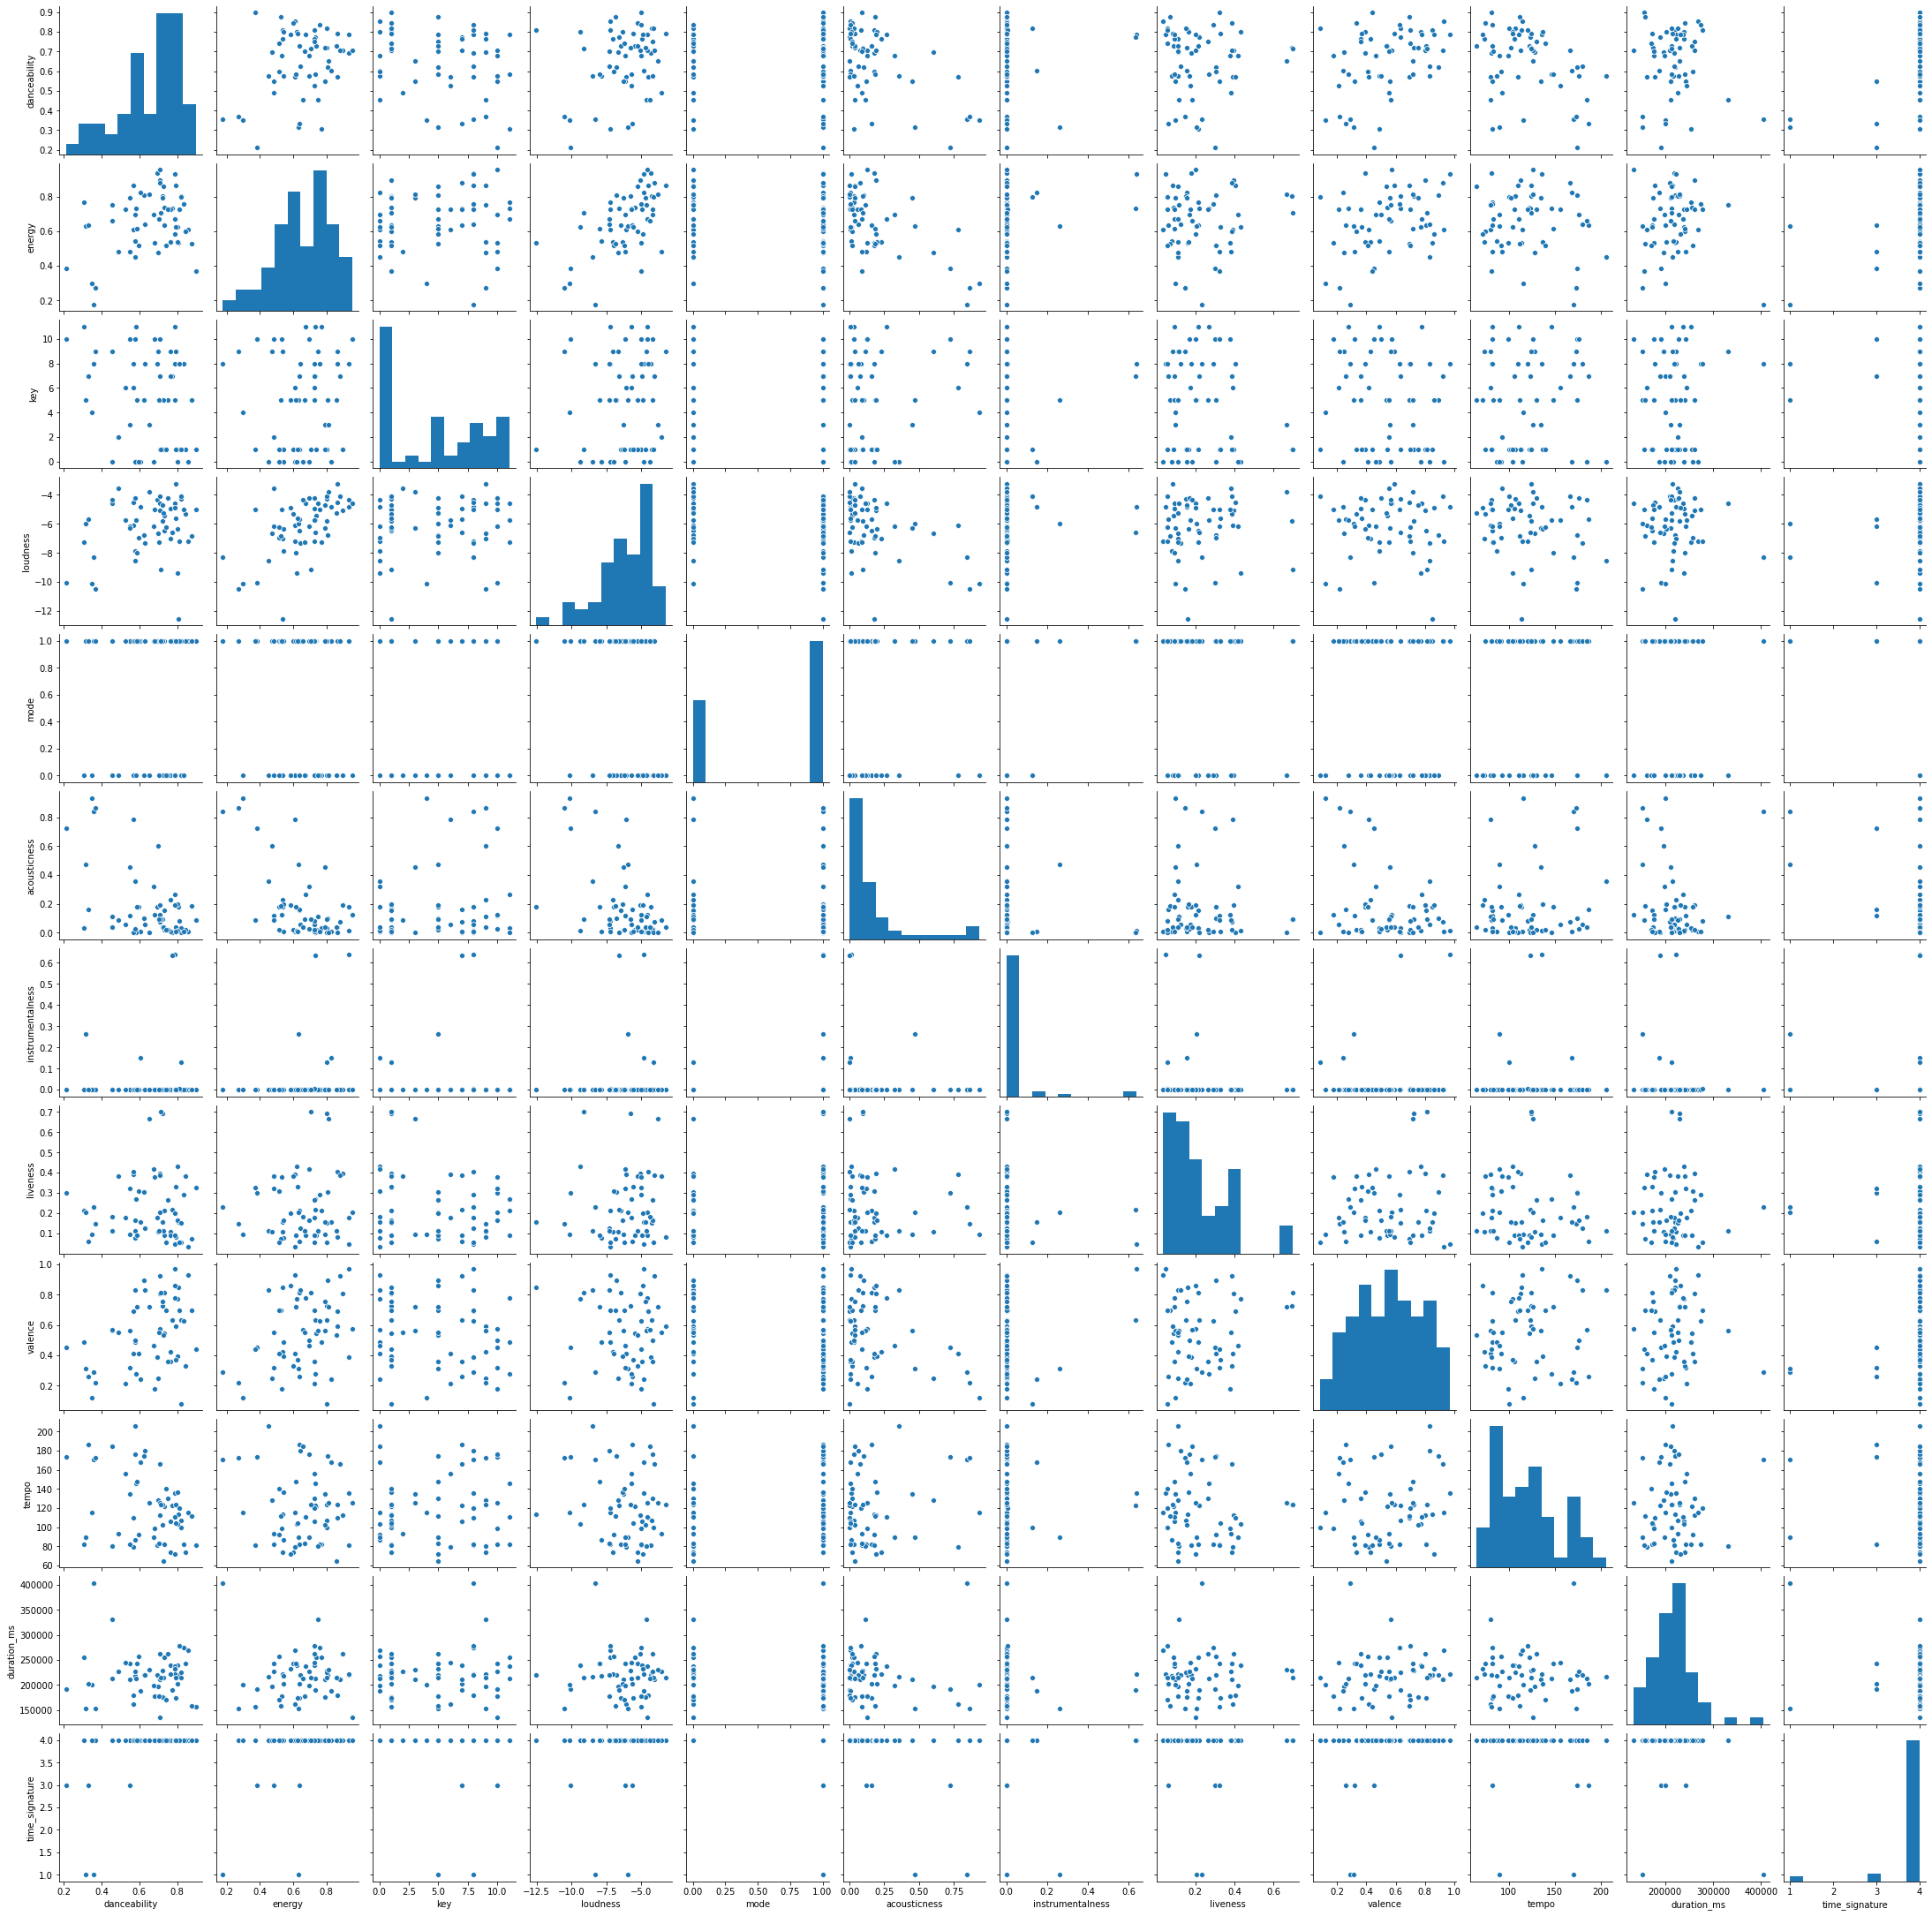

In [19]:
sns.pairplot(df_userP)

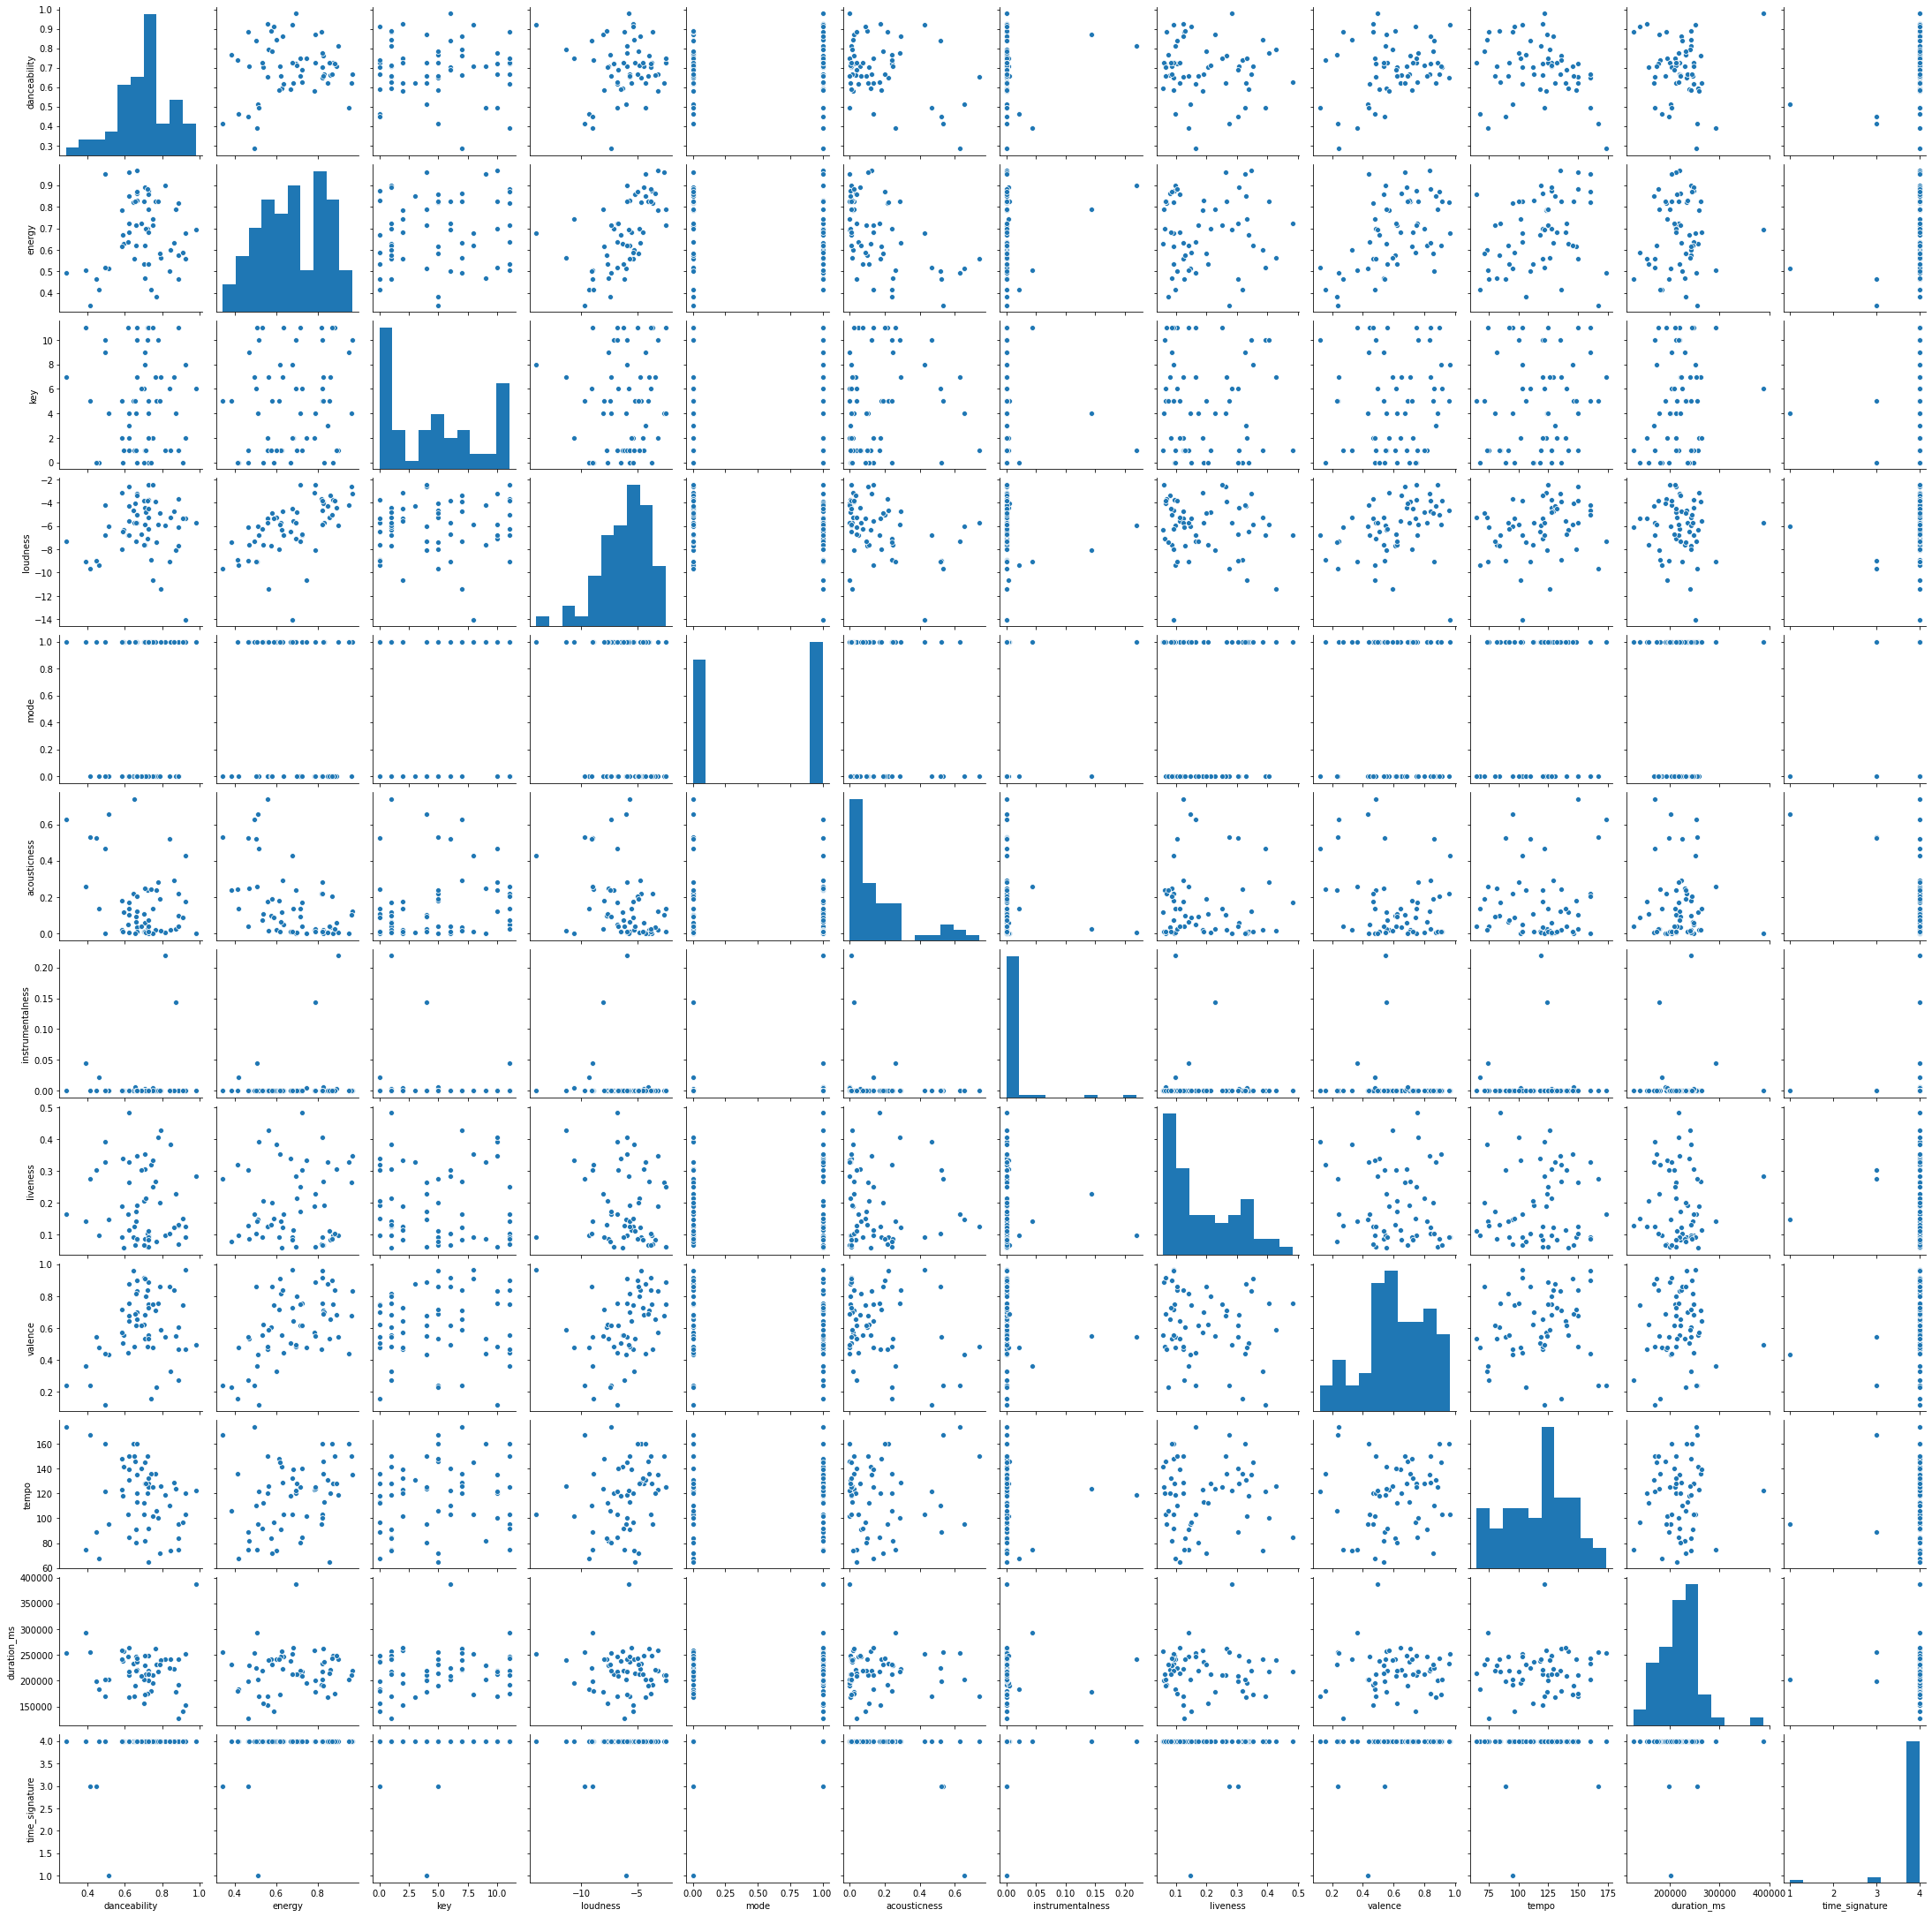

In [20]:
sns.pairplot(df_spotR)

Perform train,test, and split data

In [21]:
#remove string inputs
df_userP.drop(["id", "title", "first_artist", "all_artists"], axis = 1, inplace = True)
df_spotR.drop(["id", "title", "first_artist", "all_artists"], axis = 1, inplace = True)
df_concatP.drop(["id", "title", "first_artist", "all_artists"], axis = 1, inplace = True)
display(df_concatP)

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.729,0.735,1,-5.455,1,0.01780,0.000193,0.0890,0.544,121.986,255867,4
1,0.577,0.450,0,-8.516,0,0.35700,0.000000,0.1110,0.830,205.863,216120,4
2,0.808,0.535,1,-12.521,1,0.17900,0.000099,0.1580,0.848,114.031,220627,4
3,0.569,0.610,6,-6.105,0,0.78400,0.000000,0.3920,0.413,79.680,161613,4
4,0.697,0.474,9,-6.663,1,0.60300,0.000000,0.1100,0.249,127.904,196280,4
...,...,...,...,...,...,...,...,...,...,...,...,...
54,0.711,0.700,1,-4.805,0,0.00498,0.000125,0.2150,0.801,128.001,211920,4
55,0.688,0.723,6,-6.682,0,0.04160,0.000200,0.3020,0.618,140.023,209187,4
56,0.666,0.870,11,-5.004,0,0.20300,0.000000,0.0851,0.900,160.014,243920,4
57,0.778,0.824,10,-5.892,0,0.28400,0.000000,0.4050,0.758,100.024,218093,4


In [22]:
#df_userP = df_userP.astype(float)
#df_spotR = df_spotR.astype(float)

from sklearn.model_selection import train_test_split
x_user_dance, y_user_dance = df_userP.drop('danceability',axis=1),df_userP['danceability']
x_train_user_dance,x_test_user_dance,y_train_user_dance,y_test_user_dance = train_test_split(x_user_dance, y_user_dance, test_size=0.3, random_state=1)
x_train_user_dance.shape ,x_test_user_dance.shape ,y_train_user_dance.shape ,y_test_user_dance.shape

((42, 11), (18, 11), (42,), (18,))

In [23]:
x_rec_dance, y_rec_dance = df_spotR.drop('danceability',axis=1),df_spotR['danceability']
x_train_rec_dance,x_test_rec_dance,y_train_rec_dance,y_test_rec_dance = train_test_split(x_rec_dance, y_rec_dance, test_size=0.3, random_state=1)
x_train_rec_dance.shape ,x_test_rec_dance.shape ,y_train_rec_dance.shape ,y_test_rec_dance.shape

((42, 11), (18, 11), (42,), (18,))

In [24]:
x_concat_dance, y_concat_dance = df_concatP,df_concatP['danceability']
x_train_concat_dance,x_test_concat_dance,y_train_concat_dance,y_test_concat_dance = train_test_split(x_concat_dance, y_concat_dance, test_size=0.3, random_state=1)
x_train_concat_dance.shape ,x_test_concat_dance.shape ,y_train_concat_dance.shape ,y_test_concat_dance.shape

((78, 12), (34, 12), (78,), (34,))

# Process Regression Algorithms using testing and training data

Reference: Adapted from Scikit-Learn (https://scikit-learn.org/stable/modules/svm.html#regression) and CS595A Assignments 3 and 5 on regression. External reference were used to develop regression algorthims to find the accuracy of the dataset, for comparsion of the user generated and spotify reccommended playlists. 

StandardScaler performance

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train_user_dance)
x_train_user_dance=scaler.transform(x_train_user_dance)
x_test_rec_dance=scaler.transform(x_test_rec_dance)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train_concat_dance)
x_train_concat_dance=scaler.transform(x_train_concat_dance)
x_test_concat_dance=scaler.transform(x_test_concat_dance)

Perform Regression Algorithms on the datasets to get accuracy scores

In [27]:
#AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
adaR = AdaBoostRegressor(random_state=0, n_estimators=100)
adaR.fit(x_train_user_dance, y_train_user_dance)
adaR.score(x_train_user_dance, y_train_user_dance)

0.9100618060318509

In [28]:
adaR.score(x_train_rec_dance.values, y_train_rec_dance.values)

-0.8951487483834972

In [29]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
modelRF = RandomForestRegressor(random_state=0).fit(x_train_user_dance, y_train_user_dance)
modelRF.score(x_train_user_dance, y_train_user_dance)
#r2_score(x_test_rec_dance, y_test_user_dance)

0.9127022339262464

In [30]:
modelRF.score(x_test_rec_dance, y_test_rec_dance)

0.28013902963532256

In [31]:
#LinearRegression
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression().fit(x_train_user_dance, y_train_user_dance)
modelLR.score(x_train_user_dance, y_train_user_dance)

0.6667464758669479

In [32]:
modelLR.score(x_train_rec_dance.values, y_train_rec_dance.values)

-2423873295.3400846

In [33]:
#BaggingRegressor
from sklearn.ensemble import BaggingRegressor
modelBR = BaggingRegressor(adaR, n_estimators=100, max_samples=1.0, bootstrap=True, bootstrap_features=True,
                            max_features=1.0, random_state=42, n_jobs=-1).fit(x_train_user_dance, y_train_user_dance)
modelBR.score(x_train_user_dance, y_train_user_dance)

0.8445915298476

In [34]:
modelBR.score(x_train_rec_dance.values, y_train_rec_dance.values)

-0.5981526517499096

In [35]:
#StackingRegressor
from sklearn.ensemble import StackingRegressor
estimators = [('adaR', AdaBoostRegressor(random_state=0, n_estimators=100)),(('BR'), modelBR)]
modelSR = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(random_state=0)).fit(x_train_user_dance, y_train_user_dance)
modelSR.score(x_train_user_dance, y_train_user_dance)

0.5511619129199659

In [36]:
modelSR.score(x_train_rec_dance.values, y_train_rec_dance.values)

-0.3726717299204594

Calculate accuracy scores for each audio feautres for the regression algorithms

In [37]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor


df_user_playlist = pd.read_json('user_json.json')
df_user_playlist.drop(["id", "title", "first_artist", "all_artists"], axis=1, inplace=True)

df_spot_rec = pd.read_json('rec_json.json')
df_spot_rec.drop(["id", "title", "first_artist", "all_artists"], axis=1, inplace=True)


def calculate_feature_scores(feature_name: str) -> None:

    x_user, y_user = df_user_playlist.drop(feature_name, axis=1), df_user_playlist[feature_name]
    x_train_user, x_test_user, y_train_user, y_test_user = train_test_split(x_user, y_user, test_size=0.3, random_state=1)
    print(f"User shapes: {x_train_user.shape} {x_test_user.shape} {y_train_user.shape} {y_test_user.shape}")

    x_rec, y_rec = df_spot_rec.drop(feature_name, axis=1), df_spot_rec[feature_name]
    x_train_rec, x_test_rec, y_train_rec, y_test_rec = train_test_split(x_rec, y_rec, test_size=0.3, random_state=1)
    print(f"Recommendation shapes: {x_train_rec.shape} {x_test_rec.shape} {y_train_rec.shape} {y_test_rec.shape}")

    scaler = StandardScaler()
    x_train_user = scaler.fit_transform(x_train_user)
    #y_train_user = scaler.fit_transform(y_train_user.values.reshape(-1, 1))
    x_train_rec = scaler.fit_transform(x_train_rec)
    #y_train_rec = scaler.fit_transform(y_train_rec.values.reshape(-1, 1))

    print("---> AdaBoostRegressor")
    adaR = AdaBoostRegressor(random_state=0, n_estimators=100).fit(x_train_user, y_train_user)
    print(f"User score: {adaR.score(x_train_user, y_train_user):.3f}")
    print(f"Recommendation score: {adaR.score(x_train_rec, y_train_rec):.3f}")

    print("---> RandomForestRegressor")
    modelRF = RandomForestRegressor(random_state=0).fit(x_train_user, y_train_user)
    print(f"User score: {modelRF.score(x_train_user, y_train_user):.3f}")
    print(f"Recommendation score: {modelRF.score(x_train_rec, y_train_rec):.3f}")

    print("---> LinearRegression")
    modelLR = LinearRegression().fit(x_train_user, y_train_user)
    print(f"User score: {modelLR.score(x_train_user, y_train_user):.3f}")
    print(f"Recommendation score: {modelLR.score(x_train_rec, y_train_rec):.3f}")

    print("---> BaggingRegressor")
    modelBR = BaggingRegressor(adaR, n_estimators=100, max_samples=1.0, bootstrap=True, bootstrap_features=True,
                               max_features=1.0, random_state=42, n_jobs=-1).fit(x_train_user, y_train_user)
    print(f"User score: {modelBR.score(x_train_user, y_train_user):.3f}")
    print(f"Recommendation score: {modelBR.score(x_train_rec, y_train_rec):.3f}")

    print("---> StackingRegressor: AdaBoostRegressor & BaggingRegressor")
    modelSR = StackingRegressor(
        estimators=[('AdaBoostRegressor', AdaBoostRegressor(random_state=0, n_estimators=100)), (('BaggingRegressor'), modelBR)],
        final_estimator=RandomForestRegressor(random_state=0)
    ).fit(x_train_user, y_train_user)
    print(f"User score: {modelSR.score(x_train_user, y_train_user):.3f}")
    print(f"Recommendation score: {modelSR.score(x_train_rec, y_train_rec):.3f}")


feature_list = df_user_playlist.columns.values.tolist()
for index, feature_name in enumerate(feature_list, start=1):
    print(f"\n{index} / {len(feature_list)} Feature: {feature_name}")
    calculate_feature_scores(feature_name)



1 / 12 Feature: danceability
User shapes: (42, 11) (18, 11) (42,) (18,)
Recommendation shapes: (42, 11) (18, 11) (42,) (18,)
---> AdaBoostRegressor
User score: 0.910
Recommendation score: 0.175
---> RandomForestRegressor
User score: 0.913
Recommendation score: 0.182
---> LinearRegression
User score: 0.667
Recommendation score: -0.171
---> BaggingRegressor
User score: 0.845
Recommendation score: 0.238
---> StackingRegressor: AdaBoostRegressor & BaggingRegressor
User score: 0.551
Recommendation score: 0.141

2 / 12 Feature: energy
User shapes: (42, 11) (18, 11) (42,) (18,)
Recommendation shapes: (42, 11) (18, 11) (42,) (18,)
---> AdaBoostRegressor
User score: 0.959
Recommendation score: 0.475
---> RandomForestRegressor
User score: 0.938
Recommendation score: 0.390
---> LinearRegression
User score: 0.698
Recommendation score: 0.393
---> BaggingRegressor
User score: 0.880
Recommendation score: 0.477
---> StackingRegressor: AdaBoostRegressor & BaggingRegressor
User score: 0.744
Recommendat